<a href="https://colab.research.google.com/github/pratikasarkar/Capstone_Project/blob/Prassanth/cars_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing libraries
import re
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Loading csv
#df = pd.read_csv('cars.csv' , header = 1)
df = pd.read_csv('/content/drive/My Drive/Capstone/cars.csv',header = 1)
df=df.rename(columns = {'Unnamed: 0':'Model'})

In [0]:
df.shape

(32316, 235)

In [0]:
df = df.replace('- TBD –', 'NA')
df = df.replace('- TBD -', 'NA')
df=df.replace('-TBD-','NA')
df=df.replace('- TBD - x - TBD -','NA')
df=df.replace('-TBD -','NA')
df = df.replace('NA', np.nan)

In [0]:
#Number of missing values across columns

def missing_values(dataframe):
    null_counts = dataframe.isnull().sum()
    mean_missing = dataframe.isnull().mean()*100
    missing_val = pd.DataFrame({'Count' : null_counts[null_counts > 0] , 'Percentage Missing(%)' : mean_missing[mean_missing > 0] })
    missing_val.sort_values(by = 'Count' , inplace=True)
    missing_val.reset_index(inplace=True)
    missing_val.columns = ['Features' , 'Count' , 'Percentage Missing(%)' ]
    return missing_val
missing = missing_values(df)
missing

,Features,Count,Percentage Missing(%)
0,MSRP,54,0.167100
1,Other Features,1700,5.260552
2,Body Style,1716,5.310063
3,Drivetrain,1716,5.310063
4,Disc - Front (Yes or ),1969,6.092957
5,Engine,1975,6.111524
6,Engine Type,1975,6.111524
7,Trans Type,1981,6.130090
8,Rear Wheel Material,1983,6.136279
9,Front Wheel Material,1983,6.136279


### Dropped Columns

* Gas Mileage - Already a sperate column for City mileage and Highway mileage is given
* EPA Class - Repeated column (EPA Classification)
* Seocnd Shoulder room , Second head room , Front shoulder room , Second Hip room , Front Head room , Second leg room   Width, Max w/o mirrors (in) , Front Leg Room (in),Front Shoulder Room (in), Front Head Room (in),Front Hip Room (in), Second Leg Room (in) ,Second Head Room (in) ,Second Shoulder Room (in),Second Hip Room (in),Cargo Box (Area) Height (in),Cargo Box (Area) Height (in),Cargo Box Width @ Wheelhousings (in),Length, Overall (in), Track Width, Rear (in), Second Shoulder Room (in)      - Trackwidth , Wheelbase , Passenger Volume Specifies the dimension of the vechicle. 

* Min Ground Clearance - Many missing values + Overall height explains this
* Other Features  - 
* Disc - Front (Yes or   ) , 'Disc - Rear (Yes or   )' - Almost all cars has Disc brakes(No - 9 cars)
* Rear Wheel Material - Same as front wheel material
* Rear Tire Size' - Same as front tyre size
* Engine Type - Already present in engine
* EPA Class - Repeated column (EPA Classification)
* Rear Wheel Size (in),Front Wheel Size (in) - Rear tire size has same information
* Reverse Ratio (:1),First Gear Ratio (:1), Second Gear Ratio (:1),Third Gear Ratio (:1),Fourth Gear Ratio (:1),Sixth Gear Ratio (:1),Fifth Gear Ratio (:1), 'Final Drive Axle Ratio (:1)' -- Even a engine with same HP can have different gear ratio. Gear ratio does affect performance and not cost

* 'Gas Mileage' - Mileage is already given
* Front Brake Rotor Diam x Thickness (in), Rear Brake Rotor Diam x Thickness (in),
* Spare Tire Size, 'Spare Wheel Material','Spare Wheel Size (in)'
* 'Turning Diameter - Wall to Wall (ft)' - Turning diameter curb to curb is included
* 'Trans Order Code' - Order code is not required
*  Dead Weight Hitch - Max Trailer Wt. (lbs),Dead Weight Hitch - Max Tongue Wt. (lbs),Wt Distributing Hitch - Max Tongue Wt. (lbs),Wt Distributing Hitch - Max Trailer Wt. (lbs) -- Applicable only for pickup trucks
* Brake ABS System - Almost all value has 4 channel ABS
* Cold Cranking Amps @ 0° F (Primary) - Cranking Amps does not depends on price
* 'Suspension Type - Front (Cont.)','Suspension Type - Rear (Cont.)' - Suspension front / rear type 

In [0]:
sel_cols =['Model' , 'MSRP' , 'EPA Fuel Economy Est - City (MPG)' , 'Engine' , 'EPA Classification',
           'Style Name','Drivetrain','Passenger Capacity' , 'Passenger Doors','Body Style','Transmission',
           'Base Curb Weight (lbs)' , 'Passenger Volume (ft³)' , 'Wheelbase (in)' , 'Track Width, Front (in)',
           'Height, Overall (in)' , 'Fuel Tank Capacity, Approx (gal)' , 'SAE Net Torque @ RPM',
           'Fuel System' , 'SAE Net Horsepower @ RPM' , 'Displacement' , 'Trans Description Cont.' , 
           'Trans Type' , 'Brake Type' , 'Steering Type' , 'Suspension Type - Front' ,
           'Suspension Type - Rear' , 'Air Bag-Frontal-Driver','Air Bag-Frontal-Passenger' ,
           'Air Bag-Passenger Switch (On/Off)' , 'Air Bag-Side Body-Front','Air Bag-Side Body-Rear' , 
           'Air Bag-Side Head-Front' , 'Air Bag-Side Head-Rear' , 'Brakes-ABS' , 
           'Child Safety Rear Door Locks' , 'Daytime Running Lights' , 'Traction Control' , 'Night Vision' ,
           'Rollover Protection Bars' , 'Fog Lamps' , 'Parking Aid' , 'Tire Pressure Monitor' , 'Back-Up Camera' ,
           'Stability Control' , 'Basic Miles/km' , 'Basic Years' , 'Corrosion Miles/km' ,'Corrosion Years' ,
           'Drivetrain Miles/km' , 'Drivetrain Years' , 'Turning Diameter - Curb to Curb (ft)',
           'Front Wheel Material' ,'Front Tire Size','Stabilizer Bar Diameter - Front (in)','Roadside Assistance Years',
           'Roadside Assistance Miles/km'] 

**FEATURE DESCRIPTION**

1. Model - Car model names
2. MRSP  - Selling price in dollars
3. Engine - Type of engine used in car
4. EPA Classification - EPA size classes (Minicompact , Mid size , Compact , Mid-Size , SUV)
5. Style Name - Special features for each model (Drivetrain , Transmission , Roof , Doors , extra features)  ****
6. Drivetrain - Types of drivetrain(Conveys power from engine to wheels) used (FWD , RWD , AWD , 4WD )
7. Passenger Capacity - Number of people who can be seated
8. Passenger Doors - Number of doors in a car
9. Body Style - Body style of the car 
10. Transmission - Type of transmission used.  (Not req -- Trans type , Trans Description cont.)
11. Base Curb Weight - Total weight of the vehicle in pounds
12. Passenger Volumne - Volume of space available for passengers
13. Wheelbase - Distance between the centers of the front and rear wheels
14. Track Width Front - Distance between the centerline of two frontwheels
15. Height Overall - Overall height of the car in inches
16. Fuel Tank Capacity,Approx(gal) - Fuel tank capacity in gallon
17. SAE Net Torque @ RPM - Net optimum torque at certain range of RPM
18. Fuel System - Type of fuel injection used in car
19. SAE Net Horsepower @ RPM - Horsepower produced at engine crankshaft(without transmission losses)
20. Displacement -  Measure of the cylinder volume swept by all of the pistons (in litres)
21. Trans Description - Type of transmission used in car
22. Trans Type - Number of gears in transmission
23. Brake Type - Type of brake used in car
24. Steering type Front - Type of steering used in car front wheels
25. Steering type Rear - Type of steering used in car rear wheels
26. Air Bag Frontal Driver - Drivers Airbag(Y/N)
27. Air Bag Frontal Passenger - Front passenger Airbag(Y/N)
28. Air Bag-Side Body-Front - Airbags in front side of the car(Y/N)
29. Air Bag-Side Body-Rear - Airbags in rear side of the car(Y/N)
30. Air Bag Side Head-Front - Side airbags to protect head for front row(Y/N)
31. Air Bag Side Head-Rear  - Side airbags to protect head for rear row(Y/N)
32. Brakes -ABS - Is Antilock bracking system is present(Y/N)
33. Child Safety Rear Door Locks - Child safety door locks(Y/N)
34. Daytime Running Lights - (Y/N)
35. Traction Control - Is TCS available (Y/N)
36. Night Vision -  Thermographic camera to increase a driver's perception in darkness (Y/N)
37. Rollover Protection Bar - Is ROPS present (Y/N)
38. Fog Lamps - Is fog lamps present(Y/N)
39. Parking Aid - Senors to monitor nearby obstacles(Y/N)
40. Tire Pressure Monitor - Y/N
41. Back up Camera - Is reversing camera present (Y/N)
42. Stability Control - Is ECS present (Y/N)
43. Basic Miles/km - Warrany Kms
44. Basic Years - Warranty years
45. Corrosion Miles/km - Warranty against corrosion
46. Corrosion Years - Warranty against corrosion in years
47. Drivetrain Miles/Km - Warranty for drivetrain
48. Drivetrain Years - Warranty for drivetrain in years
49. Turning Diameter Curb to Curb(ft) -Diameter of the smallest circular turn by the car 
50. Front Wheel Material - Material in which wheel is made up of
51. Front Tire Size - Width , Aspect ratio , Speed rating , Rim size 
52. Stabilizer Bar Diameter - Front (in) - Diameter of the front sway bar
53. Roadside assistance in years - Roadside assistance provided in terms of years
54. Roadside Assistance Miles/km - Roadside assistance provided in terms of 

In [0]:
df1 = df[sel_cols]
df1.head()

,Model,MSRP,EPA Fuel Economy Est - City (MPG),Engine,EPA Classification,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,Trans Description Cont.,Trans Type,Brake Type,Steering Type,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Front Tire Size,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km
0,2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3790,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39,Aluminum,P235/55HR19,NaN,4,"50,000"
1,2019 Acura RDX Specs: FWD w/Advance Pkg,"$45,500",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3829,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39,Aluminum,P235/55HR19,NaN,4,"50,000"
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,"$43,600",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3821,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39,Aluminum,P255/45VR20,NaN,4,"50,000"
3,2019 Acura RDX Specs: FWD,"$37,400",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3783,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39,Aluminum,P235/55HR19,NaN,4,"50,000"
4,2019 Acura RDX Specs: AWD w/Technology Pkg,"$42,600",21,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,4026,104,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6,39,Aluminum,P235/55HR19,NaN,4,"50,000"


In [0]:
missing_values(df1)

,Features,Count,Percentage Missing(%)
0,MSRP,54,0.167100
1,Drivetrain,1716,5.310063
2,Body Style,1716,5.310063
3,Engine,1975,6.111524
4,Trans Type,1981,6.130090
5,Front Wheel Material,1983,6.136279
6,Front Tire Size,1988,6.151751
7,Steering Type,2011,6.222924
8,SAE Net Horsepower @ RPM,2012,6.226018
9,Wheelbase (in),2015,6.235301


## DATA CLEANING

##### Model

In [0]:
df1['Manufacturer'] = df1['Model'].str.split(' ').str[1]     #Manufacturing Company
df1['Model year'] = df1['Model'].str.split(' ').str[0]       #Model year
df1.drop(columns='Model' , inplace  = True)

In [0]:
df1['Manufacturer'].replace({'Alfa':'Alfa Romeo' , 
                             'Aston':'Aston Martin',
                             'FIAT':'Fiat',
                             'INFINITI':'Infiniti',
                             'Land':'Land Rover',
                             'MINI':'Mini',
                             'smart':'Smart'} , inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

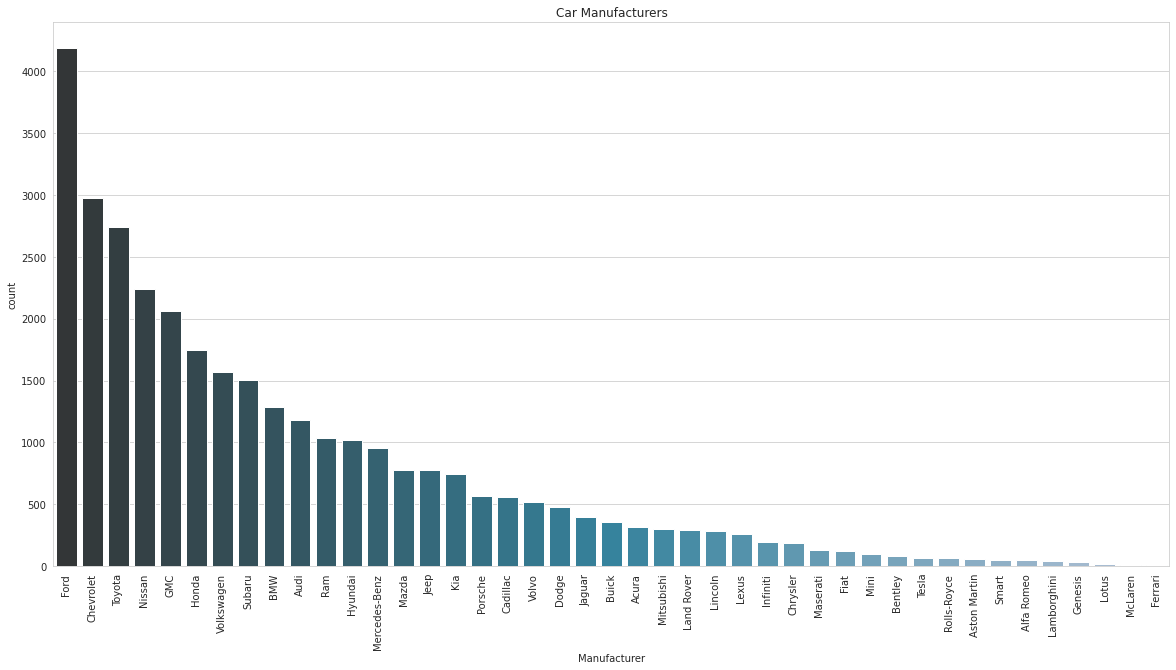

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
g = sns.countplot(
    data=df1,
    x='Manufacturer',
    order = df1['Manufacturer'].value_counts().index,
    palette='PuBuGn_d'
)
g.set_title('Car Manufacturers')
plt.xticks(rotation=90)

##### Price

In [0]:
df1['MSRP'] = df1['MSRP'].str.replace("$", "").str.replace(",", "").astype(float)

Text(0, 0.5, 'PDF')

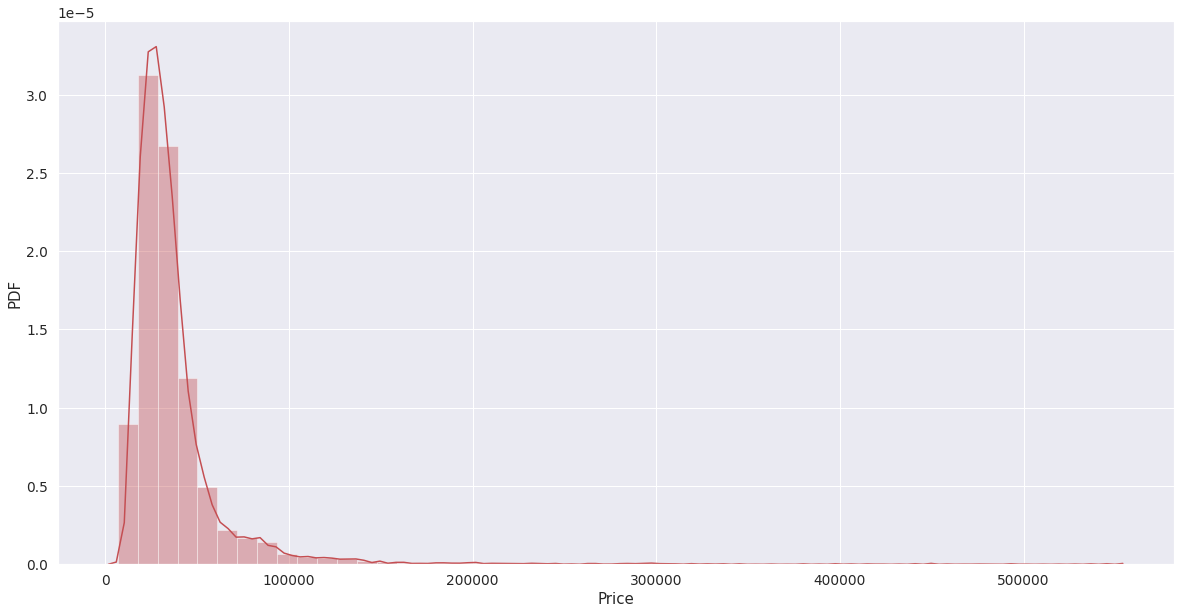

In [0]:
plt.figure(figsize=[20,10])
sns.set(font_scale=1.25)
sns.distplot(df1['MSRP'].dropna(),color='r')
plt.xlabel('Price')
plt.ylabel('PDF')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

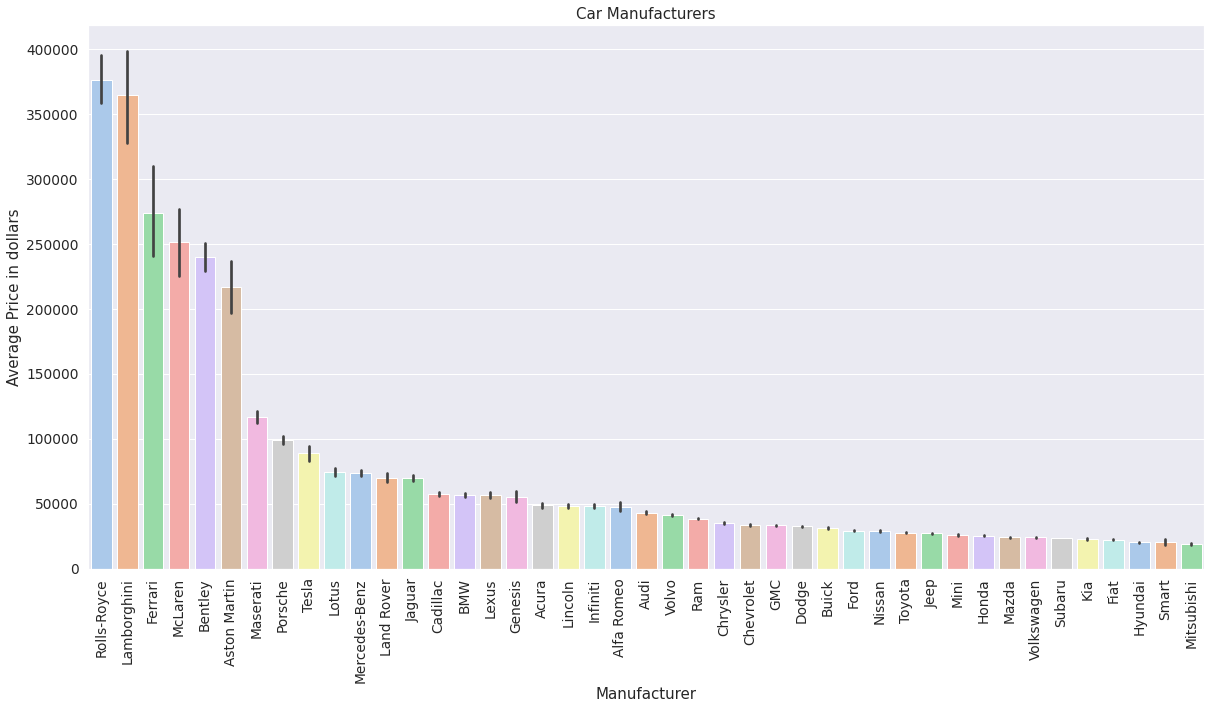

In [0]:
sns.set(font_scale=1.25)
plt.figure(figsize=(20,10))
g = sns.barplot(
    data=df1,
    x='Manufacturer',
    y='MSRP',
    order = df1.groupby(by = 'Manufacturer')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='pastel'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')
plt.xticks(rotation=90)

##### Engine

In [0]:
df1['Engine'] = df1['Engine'].str.split(',').str[0].str.split(' ').str[-1]

df1['Engine'].replace({'I-4':'l4','V-6':'V6','I4':'l4',
                       'V-12':'V12','V-8':'V8','I-5':'l5',
                       'I5':'l5','W-12':'W12','I-6':'l6',
                       '6-Cyl':'Flat','Cyl':'Flat','I-3':'l3',
                       'L4':'l4','Turbocharged':'l4','Gas':'l4',
                       '4-Cyl':'l4','5-Cyl':'l5','ECOTEC':'l4',
                       'Diesel':'l4','(Vortec)':'V8','I3':'l3',
                       'V-10':'V10','i4':'l4','4-cyl':'l4',
                       'H-6':'Flat','6':'Flat','6-cyl':'Flat',
                       'H-4':'Flat','4':'Flat','Electric/Gas':'Electric'}, inplace = True)

Text(0.5, 1.0, 'Engine Configuration')

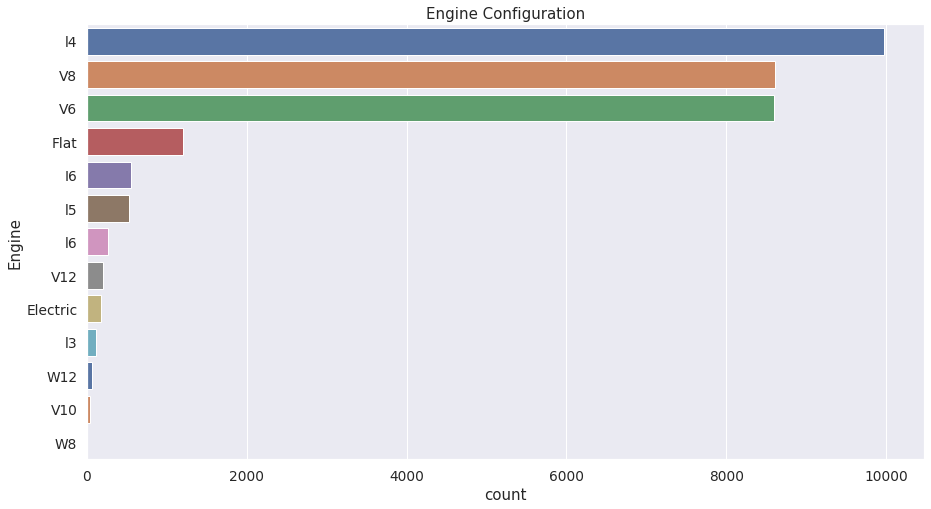

In [0]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15,8))
g = sns.countplot(
    data=df1,
    y='Engine',
    order = df1['Engine'].value_counts().index,
    palette='deep'
)
g.set_title('Engine Configuration')


Text(0.5, 1.0, 'Car Manufacturers')

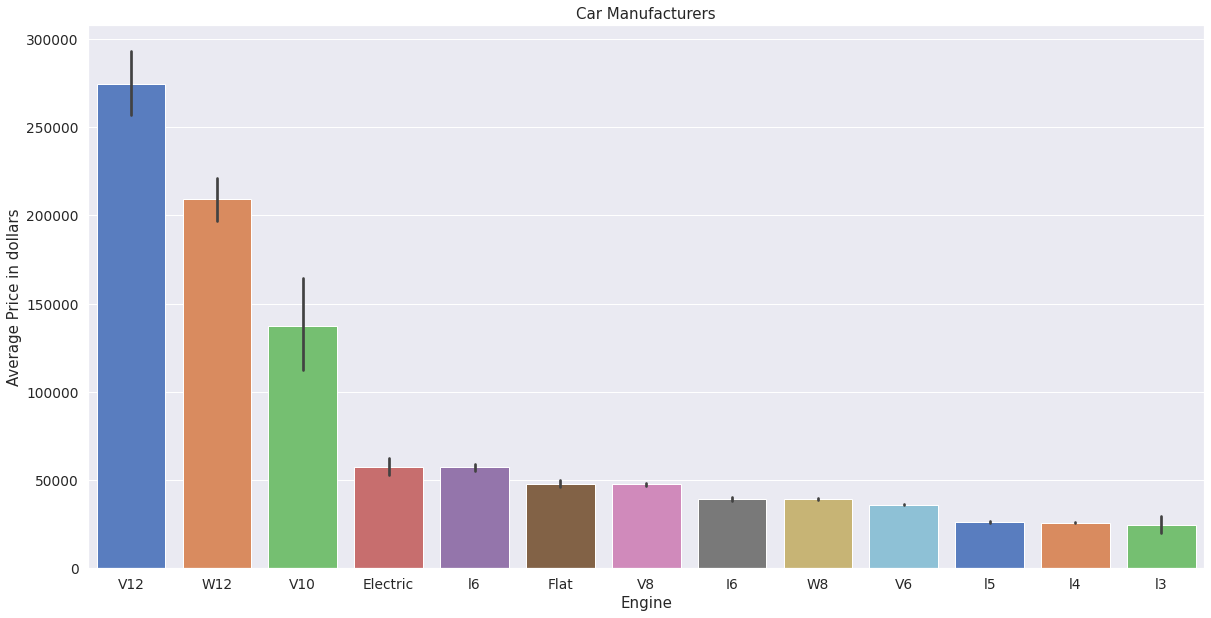

In [0]:
plt.figure(figsize=(20,10))
g = sns.barplot(
    data=df1,
    x='Engine',
    y='MSRP',
    order = df1.groupby(by = 'Engine')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')

Text(0.5, 1.0, 'Boxplot between Engine type and price')

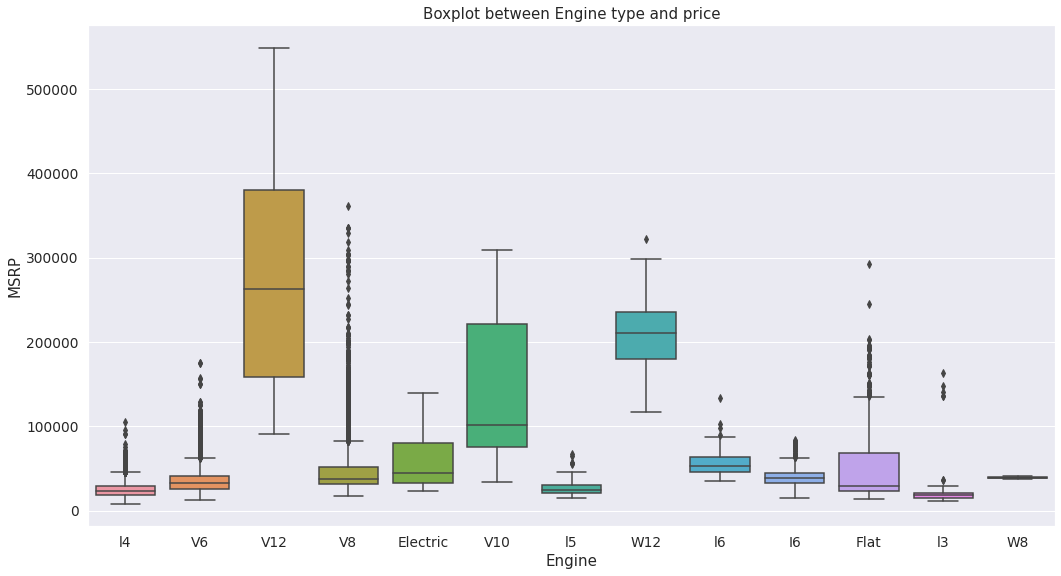

In [0]:
plt.figure(figsize=[15,8])
sns.boxplot(x='Engine' , y='MSRP',data=df1)
plt.tight_layout()
plt.title('Boxplot between Engine type and price')

#### Suspension

In [0]:
df['Suspension Type - Front'].value_counts()

Strut                               5347
Independent                         4971
MacPherson Strut                    4418
Double Wishbone                     3673
Torsion Bar                         1450
Coil Spring                         1155
MacPherson strut                     900
Independent Strut                    775
Multi-Link                           745
Short And Long Arm                   737
Double-Wishbone                      598
Coil                                 457
Coil springs                         286
Short/Long Arm                       259
Independent SLA                      238
Coil Springs                         217
Four-Link                            185
Double wishbone                      174
4-Link                               158
Other                                138
Indep Torsion Bar                    125
MacPherson                           123
Double Pivot                         122
Double-wishbone                      114
Leading Link    

In [0]:
df1['Suspension Type - Front'] = df['Suspension Type - Front']
#Suspension type Front

pattern1 = re.compile(r'(?i)(strut|MacPh|Mcpher)')                          #Strut
pattern2 = re.compile(r'(?i)(bone|short|sla|pivot|upper)')                  #Wishbone
pattern3 = re.compile(r'(?i)(tors|twis|crank|torq)')                        #Torsion bar
pattern4 = re.compile(r'(?i)(coil)')                                        #Coil spring
pattern5 = re.compile(r'(?i)(link|trap|control arm|multi|Trailing arm)')    #Link type
pattern6 = re.compile(r'(?i)(crank|solid|axle)')                            #Axle
pattern7 = re.compile(r'(?i)(leaf|stage|hotch|hypo)')                       #Leaf type
pattern8 = re.compile(r'(?i)(air)')                                         #Air suspension
pattern9 = re.compile(r'(?i)(indep|indpen|indep)')                          #Independent

df1['Suspension Type - Front'].fillna('NA',inplace = True)
df1['Suspension Type - Rear'].fillna('NA',inplace = True)

def suspension(x):
    if re.search(pattern1,x):
        return 'MacPherson Strut'
    elif re.search(pattern2,x):
        return 'Double Wishbone'
    elif re.search(pattern3,x):
        return 'Torsion Bar'
    elif re.search(pattern4,x):
        return 'Coil Spring'
    elif re.search(pattern5,x):
        return 'Link type'
    elif re.search(pattern6,x):
        return 'Axle'
    elif re.search(pattern7,x):
        return 'Leaf type'
    elif re.search(pattern8,x):
        return 'Air Suspension'
    elif re.search(pattern9,x):
        return 'Independent'
    else:
        return 'Others'

In [0]:
df1['Suspension Type - Front'] = df1['Suspension Type - Front'].apply(suspension)
df1['Suspension Type - Front'].value_counts()

MacPherson Strut    12220
Double Wishbone      6358
Independent          5051
Coil Spring          2463
Others               2440
Link type            1778
Torsion Bar          1662
Axle                  183
Leaf type             113
Air Suspension         48
Name: Suspension Type - Front, dtype: int64

In [0]:
df1['Suspension Type - Rear'] = df1['Suspension Type - Rear'].apply(suspension)
df1['Suspension Type - Rear'].value_counts()

Link type           17788
Leaf type            3020
Others               2595
Independent          2535
Double Wishbone      2490
Torsion Bar          1853
Coil Spring           718
MacPherson Strut      678
Axle                  577
Air Suspension         62
Name: Suspension Type - Rear, dtype: int64

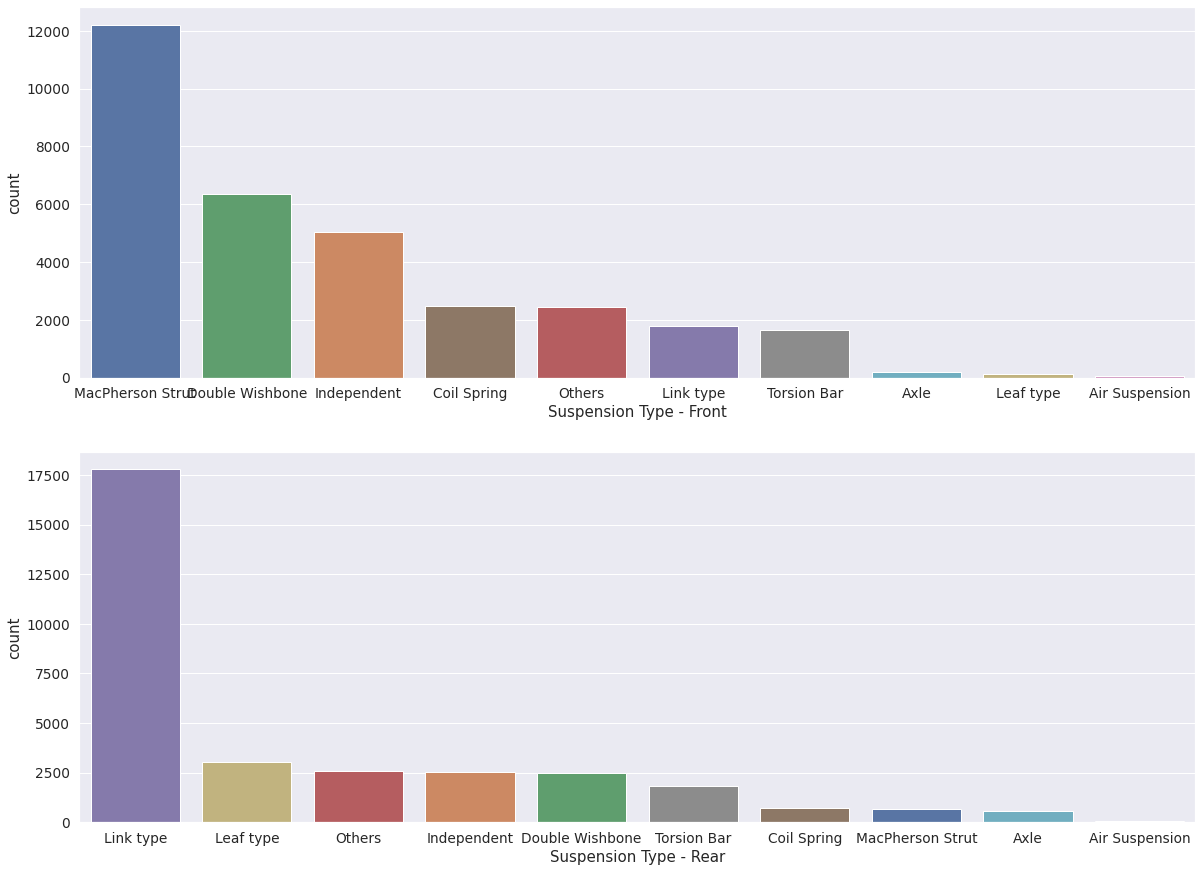

In [0]:
p = dict(zip(df1['Suspension Type - Front'].unique(), sns.color_palette()))
fig, ax =plt.subplots(2,1,figsize=(20,15))
sns.countplot(df1['Suspension Type - Front'],palette=p,order=df1['Suspension Type - Front'].value_counts().index ,ax=ax[0])
sns.countplot(df1['Suspension Type - Rear'],palette=p ,order=df1['Suspension Type - Rear'].value_counts().index ,ax=ax[1])

##### Fuel Economy

In [0]:
df1['EPA Fuel Economy Est - City (MPG)'] = df1['EPA Fuel Economy Est - City (MPG)'].str.split(' ').str[0].astype('float')

##### Curb Weight

In [0]:
df1['Base Curb Weight (lbs)'] = df1['Base Curb Weight (lbs)'].str.replace(',','').str.split(' ').str[0].str.split('-').str[0].astype('float')

##### Passenger Volume

In [0]:
df1['Passenger Volume (ft³)'] = df1['Passenger Volume (ft³)'].replace('-TBD-',np.NAN).astype('float')

##### Overall height

In [0]:
df1['Height, Overall (in)'] = df1['Height, Overall (in)'].str.split(' ').str[0].astype('float')

##### Fuel Capacity

In [0]:
df1['Fuel Tank Capacity, Approx (gal)'] = df1['Fuel Tank Capacity, Approx (gal)'].str.split(' ').str[0].astype('float')

#### Body Style

In [0]:
df1['Body Style'].replace('Crew Cab Pickup', 'Crew Cab Pickup - Standard Bed' , inplace = True)
df1['Body Style'].replace('Extended Cab Pickup', 'Extended Cab Pickup - Standard Bed' , inplace = True)
df1['Body Style'].replace('Regular Cab Chassis-Cab', 'Regular Cab Pickup - Standard Bed',inplace = True)
df1['Body Style'].replace('3dr Car' , 'Hatchback' , inplace = True)
df1['Body Style'].replace(['Crew Cab Pickup','Extended Cab Pickup'] , np.nan , inplace = True)


df1['Category'] = df1['Body Style']

van = ['Mini-van, Cargo', 'Full-size Passenger Van', 'Full-size Cargo Van', 'Mini-van, Passenger', 'Specialty Vehicle']

pickups = ['Crew Cab Pickup - Short Bed', 'Crew Cab Pickup - Standard Bed', 
        'Extended Cab Pickup - Short Bed', 'Extended Cab Pickup - Standard Bed',
        'Extended Cab Pickup - Long Bed', 'Regular Cab Pickup - Long Bed', 
        'Crew Cab Pickup - Long Bed', 'Regular Cab Pickup - Short Bed', 
        'Regular Cab Pickup - Standard Bed', 'Extended Cab Pickup', 'Crew Cab Pickup',
        'Regular Cab Chassis-Cab', 'Pickup - Short Bed', 'Pickup - Standard Bed', 'Pickup - Long Bed']

car = ['2dr Car', '4dr Car', 'Convertible', 'Station Wagon', '3dr Car', 'Hatchback']

df1['Category'] = df1['Category'].str.replace('Sport Utility', 'SUV')

for item in van:
    df1['Category'] = df1['Category'].str.replace(item, 'Van')
    
for item in pickups:
    df1['Category'] = df1['Category'].str.replace(item, 'Pickup')
    
for item in car:
    df1['Category'] = df1['Category'].str.replace(item, 'Car')

#### Drivetrain

In [0]:
df1['Drivetrain'].replace(['Front Wheel Drive', 'Front-Wheel Drive' , 
                           'Front wheel drive','Front-wheel drive' ,
                           '2 Wheel Drive' , '2WD' , '2-Wheel Drive'] , 'FWD' , inplace = True)
df1['Drivetrain'].replace(['Rear Wheel Drive' , 'REAR WHEEL DRIVE' , 
                           'Rear-Wheel Drive' ,'Rear wheel drive'] , 'RWD' , inplace = True)
df1['Drivetrain'].replace(['All Wheel Drive' , 'All-Wheel Drive' ,
                           'All wheel drive' , 'All-wheel drive' ] , 'AWD' , inplace = True)
df1['Drivetrain'].replace(['4 Wheel Drive' , 'Four Wheel Drive' , 
                           '4-Wheel Drive' , 'Four-Wheel Drive' , 
                           '4-wheel Drive' , 'Four wheel drive'] , '4WD' , inplace = True)

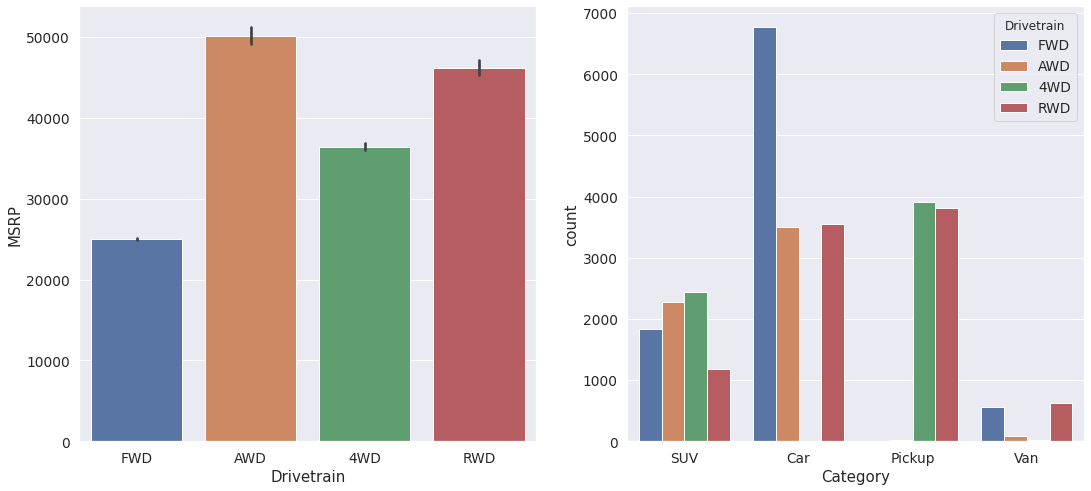

In [0]:
fig, ax =plt.subplots(1,2,figsize=(18,8))
sns.barplot(df1['Drivetrain'] , df1['MSRP'] , ax=ax[0])
sns.countplot(df1['Category'] , hue=df1['Drivetrain'] , ax=ax[1])

Text(0.5, 1.06, 'Boxplot between Price and Drivetrain types')

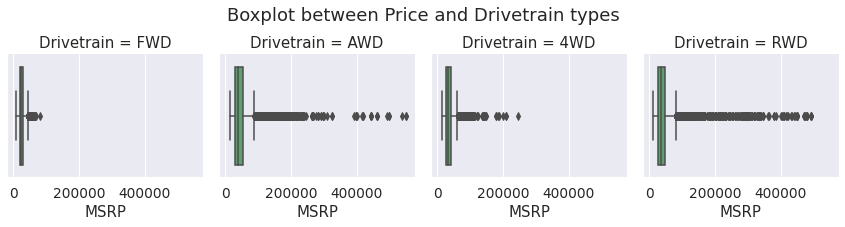

In [0]:
g = sns.FacetGrid(df1 , col='Drivetrain')
g.map(sns.boxplot , 'MSRP',color='g')
g.fig.suptitle('Boxplot between Price and Drivetrain types',y=1.06)

#### Number of gears

In [0]:
df1['Trans Type'].replace(10.0 , '10' , inplace = True)
df1['Trans Type'].replace(9.0 , '9' , inplace = True)
df1['Trans Type'].replace(8.0, '8' , inplace = True)
df1['Trans Type'].replace(7.0, '7' , inplace = True)
df1['Trans Type'].replace(['6.0' ,6.0, '6-speed' , 'Tiptronic'] , '6' , inplace = True)
df1['Trans Type'].replace(['5.0',5.0 , '5-speed','5-Speed' , 'HD 5'] , '5' , inplace = True)
df1['Trans Type'].replace(['4-Speed','4.0',4.0] , '4' , inplace = True)
df1['Trans Type'].replace(['4-Speed'] , '4' , inplace = True)
df1['Trans Type'].replace('2','<3',inplace = True)
df1['Trans Type'].replace('3','<3',inplace = True)
df1['Trans Type'].replace([1,'1'],'<3',inplace = True)

In [0]:
df1['Trans Type'].value_counts()

6      11449
5       7459
4       4663
8       3015
<3      1668
7       1379
9        487
10       193
CVT       22
Name: Trans Type, dtype: int64

In [0]:
#sns.swarmplot(x = df1['Trans Type'] ,y= df1['MSRP'])

#### Fuel System

In [0]:
#DI - Direct Injection , SFI - Sequential fuel injection ,EFI -  Electronic Fuel Injection
df1['Fuel System'].replace(['Gasoline Direct Injection' , 'Direct Injection' , 'Port/Direct Injection' , 
                            'Diesel Direct Injection' ,'NDIS', 'DI' , 'Direct Gasoline Injection' ,'MPFI' , 
                            'Turbocharged DI','FSI','SIDI','SMFI','Turbocharged SMPI','TDI', 
                            'TFSI Direct','Turbocharged','Direct injection','TFSI','GDI','SDI','Turbo-Diesel',
                            'Turbo-Charged OHV','FSI Direct','DOHC FSI Direct','Direct','DISI','SFI/DI'
                            'Turbocharged FSI','Turbo-Charged DI','CDI','Turbocharged FSI','FI','SFI/DI'
                            'NDIS','CRD','DIS','SFI/DI','SFI/DI','PFI','HPI'] , 'DI' , inplace = True)

df1['Fuel System'].replace(['Sequential MPI','SMPI','SEFI','MPI','MFI','SFI FlexFuel','Sequential MPI (injection)'
                            'Sequential Fuel Injection','SPI','SI','Sequential Fuel Injection',
                            'Supercharged SPFI','SMPFI','Sequential MPI (injection)'] , 'SFI' , inplace = True)

df1['Fuel System'].replace(['Electronic Fuel Injection','PGM-FI','Electronic fuel injection' , 
                            'Turbocharged EFI','EMPI','PGM-FI MPI','Supercharged EFI','FFV',
                            'Electronic Fuel Injectino','Electric','Hydrogen','Turbocharged EMFI','EFI',
                            'FFV','SPFI'] , 'Electric FI' , inplace = True)

In [0]:
df1['Fuel System'].value_counts()

SFI            12564
DI             10644
Electric FI     6278
Name: Fuel System, dtype: int64

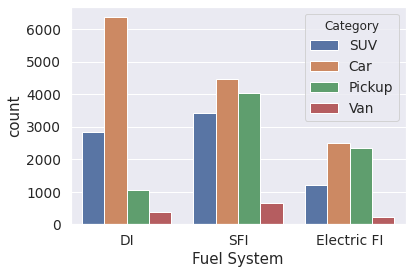

In [0]:
sns.countplot(df1['Fuel System'],hue=df1['Category'])

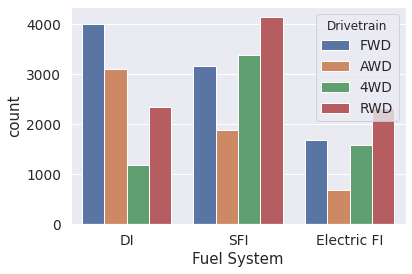

In [0]:
sns.countplot(df1['Fuel System'],hue=df1['Drivetrain'])

Text(0.5, 1.0, 'Car Manufacturers')

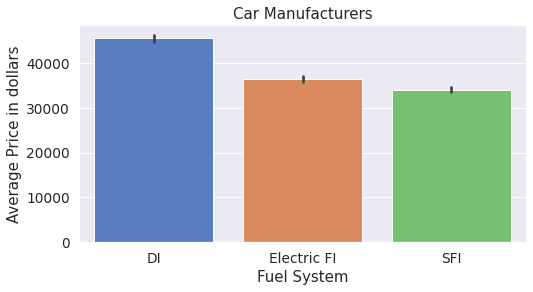

In [0]:
plt.figure(figsize=(8,4))
g = sns.barplot(
    data=df1,
    x='Fuel System',
    y='MSRP',
    order = df1.groupby(by = 'Fuel System')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')

#### Type of transmission

In [0]:
pattern1 = re.compile(r'(?i)(auto|hd auto|elec)')                                   #Automatic                   
pattern2 = re.compile(r'(?i)(man|hd man)')                                          #Manual               
pattern3 = re.compile(r'(?i)(cont|cvt|ECVT)')                                       #CVT
pattern4 = re.compile(r'(?i)(Automatic w/OD|Automatic|Auto w/OD|elec|tip|smg)')     #Automatic
pattern5 = re.compile(r'(?i)(Man|dsg|hd)')                                          #Manual

df1['Trans Description Cont.'].fillna('NA',inplace = True)

def transmission(x):
    if re.match(pattern2,x) or re.search(pattern5,x):
        return 'Manual'
    elif re.match(pattern1,x) or re.search(pattern4,x):
        return 'Automatic'
    elif re.match(pattern3,x):
        return 'CVT'
    else:
        return x
    
df1['Trans Description Cont.'] = df1['Trans Description Cont.'].apply(transmission)
df1['Trans Description Cont.'].value_counts()

Automatic    19086
Manual        9597
NA            2037
CVT           1596
Name: Trans Description Cont., dtype: int64

Text(0.5, 1.0, 'Car Manufacturers')

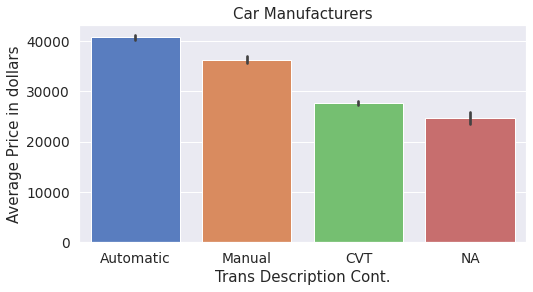

In [0]:
plt.figure(figsize=(8,4))
g = sns.barplot(
    data=df1,
    x='Trans Description Cont.',
    y='MSRP',
    order = df1.groupby(by = 'Trans Description Cont.')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')

#### Horsepower

In [0]:
#Net horsepower
df1['SAE Net Horsepower @ RPM'] = pd.to_numeric(df1['SAE Net Horsepower @ RPM'].str.split('@').str[0].str.split(' ').str[0],errors='coerce')

Text(0, 0.5, 'PDF')

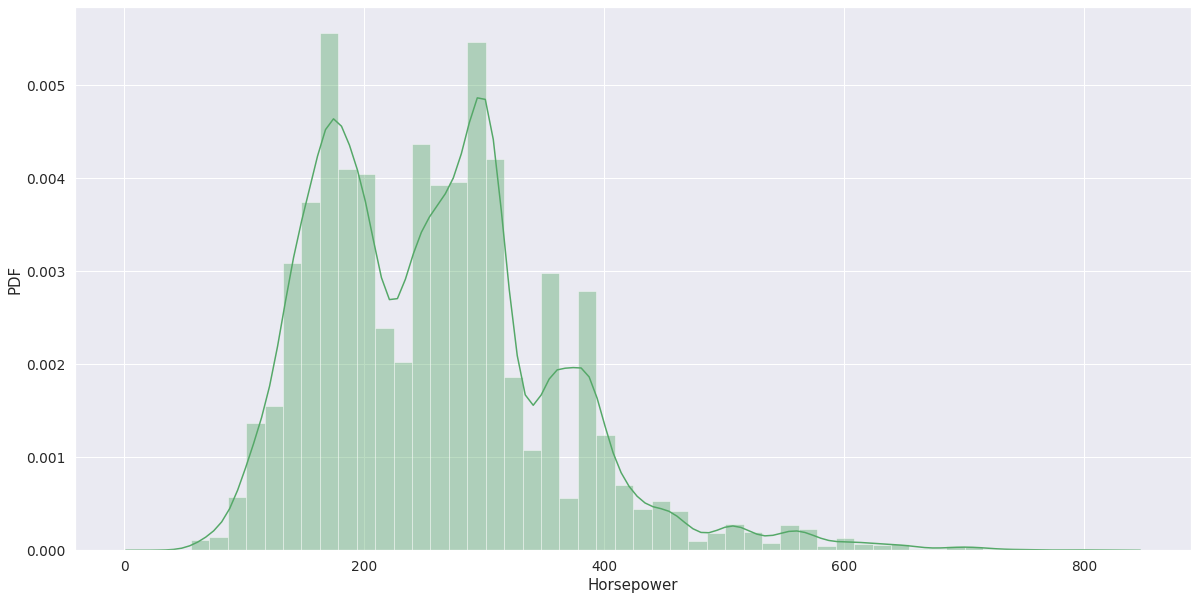

In [0]:
plt.figure(figsize=[20,10])
sns.set(font_scale=1.25)
sns.distplot(df1['SAE Net Horsepower @ RPM'].dropna(),color='g')
plt.xlabel('Horsepower')
plt.ylabel('PDF')

Text(0.5, 1.05, 'Comparision between Horsepower and Price')

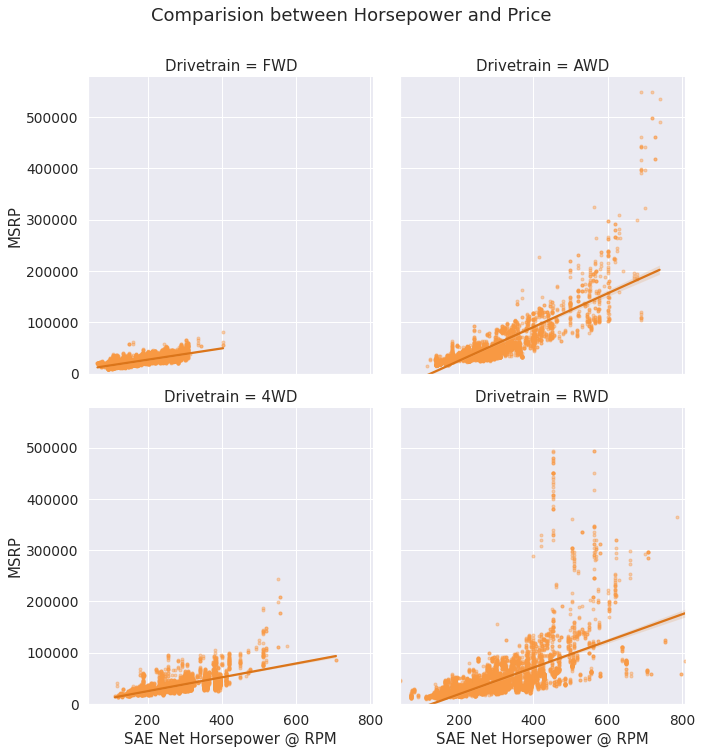

In [0]:
lm = sns.lmplot(x = 'SAE Net Horsepower @ RPM' , 
           y = 'MSRP' ,
           markers= '.',
           col = 'Drivetrain',
           col_wrap=2,
           palette='Blues',
           scatter_kws={'alpha':0.4, 'color':'#fa9943'},
           line_kws={'color': '#db751a'},
           data=df1)
lm.set(ylim=(0, None))
lm.fig.suptitle('Comparision between Horsepower and Price',y=1.05)

#### Torque

In [0]:
#Net Torque
df1['SAE Net Torque @ RPM'] = pd.to_numeric(df1['SAE Net Torque @ RPM'].str.split('@').str[0].str.split(' ').str[0], errors='coerce')

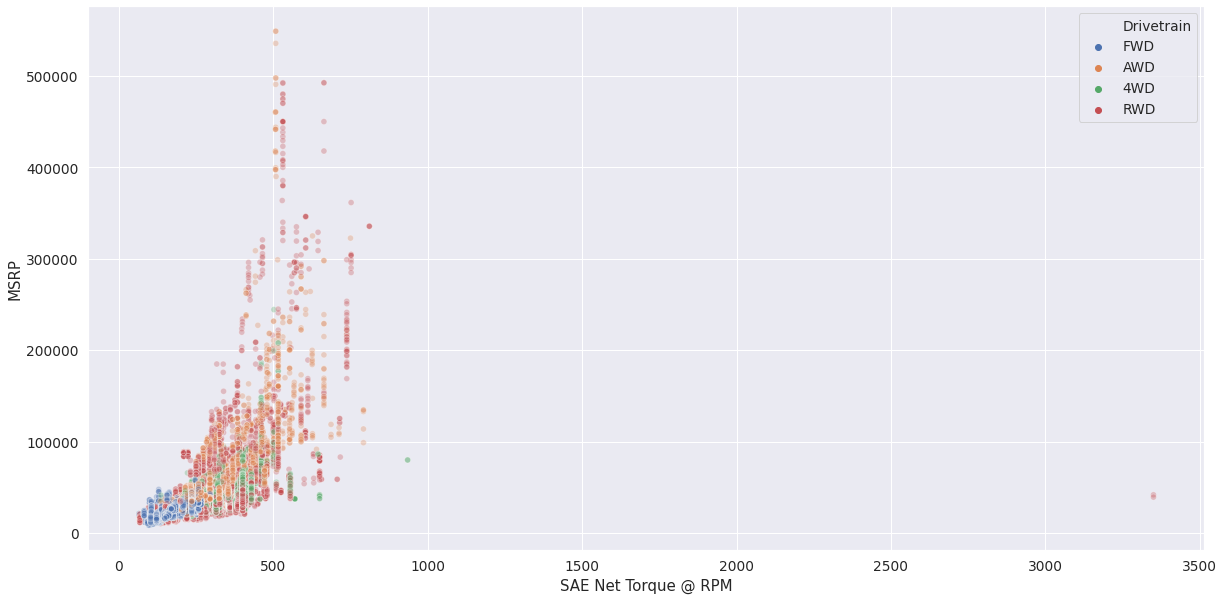

In [0]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['SAE Net Torque @ RPM'] , df1['MSRP'],hue = df1['Drivetrain'] , alpha = 0.3)

In [0]:
#Torque value above 1000 Nm is highly unlikely
df[df1['SAE Net Torque @ RPM'] > 1000][['Model','Engine','SAE Net Torque @ RPM']]

,Model,Engine,SAE Net Torque @ RPM
5725,2009 Chevrolet Tahoe Specs: 2WD 4-Door 1500 LT...,"Gas/Ethanol V8, 5.3L",3350 @ 4400
5726,2009 Chevrolet Tahoe Specs: 2WD 4-Door 1500 LT...,"Gas/Ethanol V8, 5.3L",3350 @ 4400


In [0]:
#Torque produced by Chevrolet Tahoe is around 460 Nm
df1['SAE Net Torque @ RPM'].replace(3350,460,inplace=True)

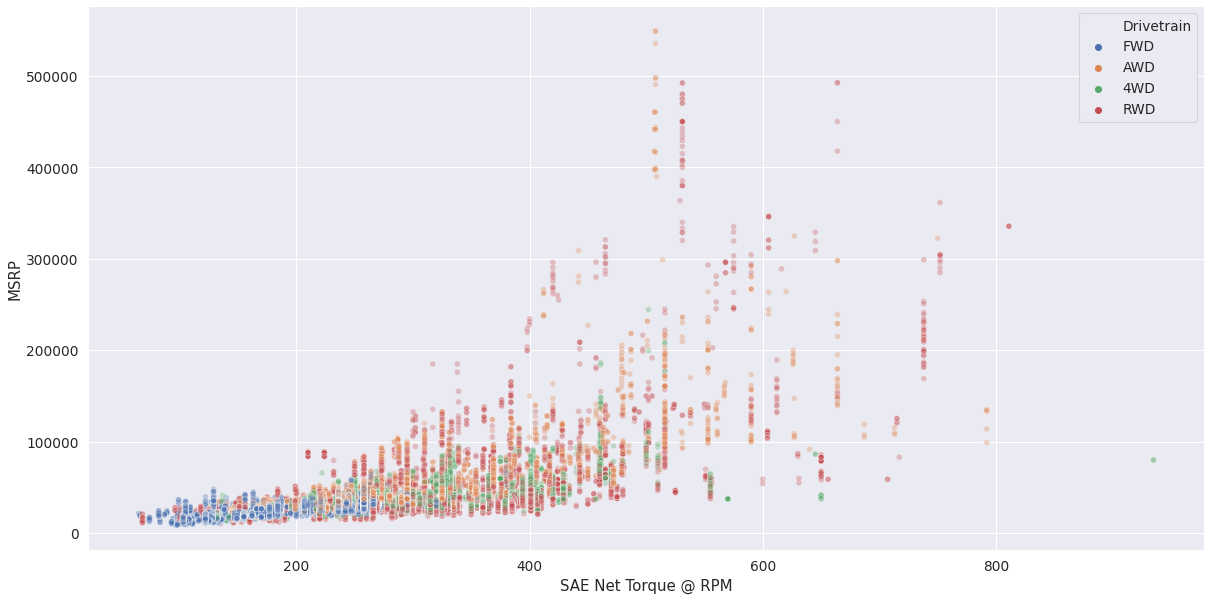

In [0]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['SAE Net Torque @ RPM'] , df1['MSRP'],hue = df1['Drivetrain'] , alpha = 0.3)

#### Displacement

In [0]:
df1['Displacement'] = pd.to_numeric(df1['Displacement'].str.strip(' ').str.split('L').str[0].str.split('/').str[0].str.split(' ').str[0]
                      ,errors='coerce')

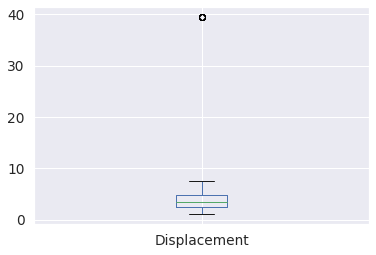

In [0]:
df1['Displacement'].plot(kind='box')

In [0]:
df[df1['Displacement'] > 8][['Engine','Displacement']]

,Engine,Displacement
2641,"Electric/Gas,",39.5 Cu.in. Range Extender
2642,"Electric/Gas,",39.5 Cu.in. Range Extender
2645,"Electric/Gas,",39.5 Cu.in. Range Extender
2646,"Electric/Gas,",39.5 Cu.in. Range Extender
2649,"Electric/Gas,",39.5 Cu.in. Range Extender
2651,"Electric/Gas,",39.5 Cu.in. Range Extender
2653,"Electric/Gas,",39.5 Cu.in. Range Extender


In [0]:
#BMW i3 is a hybrid car which has engine size of 650 cc
df1['Displacement'].replace(39.5,0.65,inplace=True)

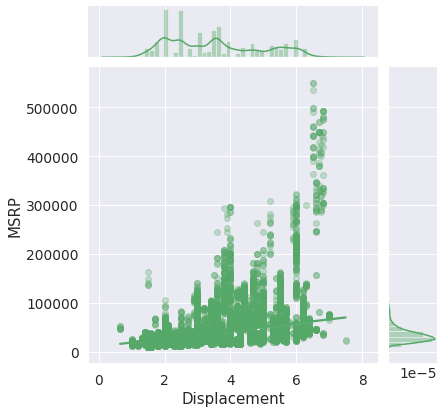

In [0]:
g = sns.jointplot(data=df1 , x = 'Displacement' , y = 'MSRP',kind='reg',color = 'g',
                 joint_kws = {'scatter_kws':dict(alpha=0.3)})

#### Turning Diamter

In [0]:
df1['Turning Diameter - Curb to Curb (ft)'] = pd.to_numeric(df1['Turning Diameter - Curb to Curb (ft)'].str.split(' ').str[0],
                                                            errors='coerce')

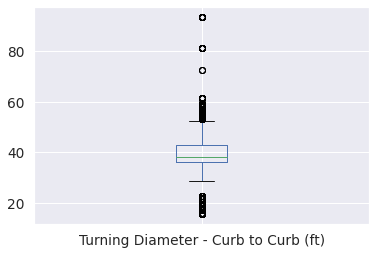

In [0]:
df1['Turning Diameter - Curb to Curb (ft)'].plot(kind='box')

In [0]:
#Outliers
df[(df1['Turning Diameter - Curb to Curb (ft)'] < 20) | (df1['Turning Diameter - Curb to Curb (ft)'] > 80)][['Model' , 'Turning Diameter - Curb to Curb (ft)']]

,Model,Turning Diameter - Curb to Curb (ft)
16428,2000 Hyundai Sonata Specs: 4-Door Sedan Automatic,17.25
16429,2000 Hyundai Sonata Specs: 4-Door Sedan GLS V6...,17.25
16430,2000 Hyundai Sonata Specs: 4-Door Sedan GLS V6...,17.25
16431,2000 Hyundai Sonata Specs: 4-Door Sedan Manual,17.25
16432,1999 Hyundai Sonata Specs: 99A 4-Door Sedan Au...,17.3
16433,1999 Hyundai Sonata Specs: 99B 4-Door Sedan GL...,17.3
16434,1999 Hyundai Sonata Specs: 99B 4-Door Sedan GL...,17.3
16435,1999 Hyundai Sonata Specs: 99B 4-Door Sedan Ma...,17.3
16436,1999 Hyundai Sonata Specs: 99B 4-Door Sedan Au...,17.3
16437,1999 Hyundai Sonata Specs: 99A 4-Door Sedan GL...,17.3


List of cars in which turning radius is given as turning diameter : 
    * Hyundai Sonata
    * Hyundai Accent
    * Kia Niro
    * Lexus LS
    * Mazda MAZDA3
    * Maxda MX-5

Since Ram ProMaster is a full size van it can have turning diamter above 80 feet 

In [0]:
df1['Turning Diameter - Curb to Curb (ft)'] = df1['Turning Diameter - Curb to Curb (ft)'].apply(lambda x: x*2 if x <20 else x)

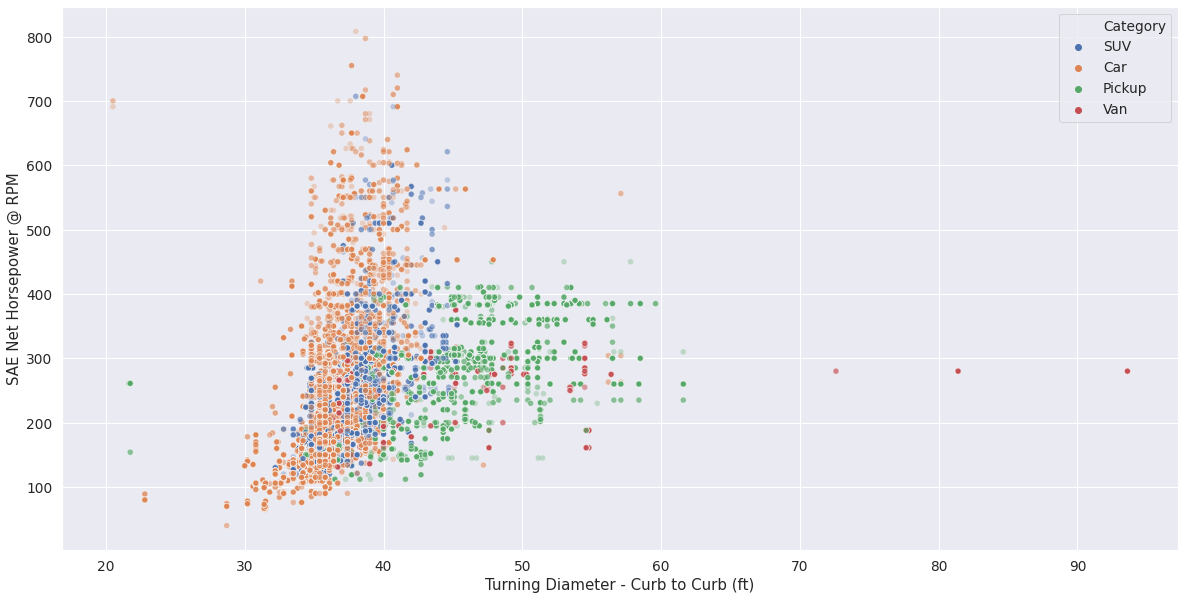

In [0]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['Turning Diameter - Curb to Curb (ft)'] , df1['SAE Net Horsepower @ RPM'],hue = df1['Category'] , alpha = 0.3)

##### Wheels

In [0]:
df1['Front Wheel Material'].replace('Styled Steel','Steel',inplace = True)
df1['Front Wheel Material'].replace('Forged Aluminum','Aluminum',inplace = True)
df1['Front Wheel Material'].replace('Chrome','Alloy',inplace= True)
df1['Front Wheel Material'].value_counts()

Aluminum        19974
Steel            7384
Alloy            2972
Carbon Fibre        3
Name: Front Wheel Material, dtype: int64

In [0]:
#df1['Front tire vehicle type']=list(map(lambda x: str(x)[0],df1['Front Tire Size']))
df1['Front tire width']=list(map(lambda x: str(x)[1:4],df1['Front Tire Size']))
df1['Front tire aspect ratio']=list(map(lambda x: str(x)[0:2],df1['Front Tire Size'].str.split('/').str[1]))
df1['Front tire speed ratings/cons.type']=list(map(lambda x: str(x)[2:-2],df1['Front Tire Size'].str.split('/').str[1]))
df1['Front tire rim size']=list(map(lambda x: str(x)[-2:],df1['Front Tire Size'].str.split('/').str[1]))

df1=df1.drop('Front Tire Size',axis=1)

In [0]:
df1['Front tire aspect ratio'] = df1['Front tire aspect ratio'].replace(['YR','na',''],np.nan)
df1['Front tire aspect ratio'] = df1['Front tire aspect ratio'].replace('71',70)
df1['Front tire aspect ratio'] = df1['Front tire aspect ratio'].replace('31',30)

In [0]:
#df1['Front tire aspect ratio'].value_counts(dropna = False)

In [0]:
pattern1 = re.compile(r'(?i)(z)')     #Z - 240+ Kmph                  
pattern2 = re.compile(r'(?i)(v)')     #V - 240  Kmph       
pattern3 = re.compile(r'(?i)(h)')     #H - 210  Kmph
pattern4 = re.compile(r'(?i)(t)')     #T - 190  Kmph
pattern5 = re.compile(r'(?i)(r)')     #R - 170  Kmph

def tire_speed(x):
    if re.match(pattern1,x):
        return 'Z'
    elif re.match(pattern2,x):
        return 'V'
    elif re.match(pattern3,x):
        return 'H'
    elif re.match(pattern4,x):
        return 'T'
    elif re.match(pattern5,x):
        return 'R'
    else:
        return 'NA'
    
df1['Front tire speed ratings/cons.type'] = df1['Front tire speed ratings/cons.type'].apply(tire_speed)
df1['Front tire speed ratings/cons.type'].value_counts(dropna = False)

R     16009
NA     6086
H      5235
V      2556
T      1239
Z      1191
Name: Front tire speed ratings/cons.type, dtype: int64

In [0]:
df1['Front tire rim size'].value_counts(dropna = False)

17    7612
18    6453
16    5998
15    3078
20    2188
19    2133
an    2005
6E     617
7E     589
14     470
SL     366
8E     222
22     196
21     159
13      84
7D      28
0E      24
XL      21
AS      15
EL       8
7C       8
0A       6
95       6
8C       6
45       6
50       6
         6
40       5
7R       1
Name: Front tire rim size, dtype: int64

In [0]:
pattern1 = re.compile(r'(1[5-9]|2[0-8])')

def rim_size(x):
    if re.match(pattern1,x):
        return x
    else:
        return np.nan
    
df1['Front tire rim size'] = df1['Front tire rim size'].apply(rim_size)
df1['Front tire rim size'].value_counts(dropna = False)

17     7612
18     6453
16     5998
NaN    4499
15     3078
20     2188
19     2133
22      196
21      159
Name: Front tire rim size, dtype: int64

##### Sway Bar

In [0]:
df1['Stabilizer Bar Diameter - Front (in)'] = pd.to_numeric(df1['Stabilizer Bar Diameter - Front (in)'],errors='coerce')

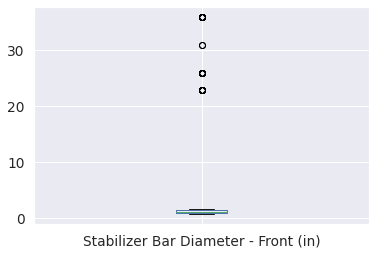

In [0]:
df1['Stabilizer Bar Diameter - Front (in)'].plot(kind= 'box')

In [0]:
#Above 2 inch is highly unlikely
df1.loc[df1['Stabilizer Bar Diameter - Front (in)']>2,'Stabilizer Bar Diameter - Front (in)'] = np.nan

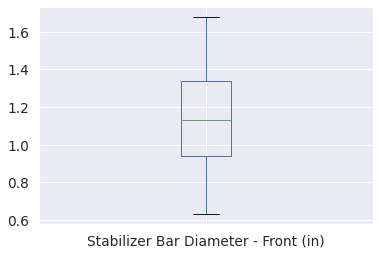

In [0]:
df1['Stabilizer Bar Diameter - Front (in)'].plot(kind= 'box')

In [0]:
y_n = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger',
       'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front',
       'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front',
       'Air Bag-Side Head-Rear', 'Brakes-ABS', 'Child Safety Rear Door Locks',
       'Daytime Running Lights', 'Traction Control', 'Night Vision',
       'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid',
       'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control']

for i in y_n:
    df1[i] = df1[i].map({'Yes':1 , 'No':0})

In [0]:
df1['Corrosion Miles/km'] = df1['Corrosion Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df1['Corrosion Miles/km'] = df1['Corrosion Miles/km'].astype(float)
df1['Corrosion Miles/km'].value_counts()

150000.0    20800
100000.0     7401
50000.0      1105
60000.0         6
Name: Corrosion Miles/km, dtype: int64

In [0]:
df1['Drivetrain Miles/km'] = df1['Drivetrain Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df1['Drivetrain Miles/km'] = df1['Drivetrain Miles/km'].astype(float)
df1['Drivetrain Miles/km'].value_counts()

60000.0     12771
100000.0     6519
50000.0      4927
36000.0      2928
70000.0      1587
150000.0      410
24000.0       227
72000.0       137
80000.0        10
62139.0         6
120000.0        5
125000.0        1
Name: Drivetrain Miles/km, dtype: int64

In [0]:
df1['Basic Miles/km'] = df1['Basic Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df1['Basic Miles/km'] = df1['Basic Miles/km'].str.replace("49999", "50000")
df1['Basic Miles/km'] = df1['Basic Miles/km'].astype(float)
df1['Basic Miles/km'].value_counts()

36000.0     19862
50000.0      7152
60000.0      2278
150000.0      290
24000.0       255
100000.0      214
72000.0       137
49711.0         6
42000.0         5
Name: Basic Miles/km, dtype: int64

In [0]:
df1['Roadside Assistance Miles/km'] = df1['Roadside Assistance Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")
df1['Roadside Assistance Miles/km'] = df1['Roadside Assistance Miles/km'].str.replace("49711", "50000")
df1['Roadside Assistance Miles/km'] = df1['Roadside Assistance Miles/km'].str.replace("24000", "25000")
df1['Roadside Assistance Miles/km'] = df1['Roadside Assistance Miles/km'].astype(float)
df1['Roadside Assistance Miles/km'].value_counts()

36000.0     7286
150000.0    6164
60000.0     4636
100000.0    3608
50000.0     2502
70000.0      661
25000.0      436
Name: Roadside Assistance Miles/km, dtype: int64

In [0]:
df1['Drivetrain Years'] = df1['Drivetrain Years'].str.replace('Unlimited','20')
df1['Roadside Assistance Years'] = df1['Roadside Assistance Years'].str.replace('Unlimited','20')

In [0]:
df1.drop(columns=['EPA Classification' , 'Style Name' ,'Body Style' ,'Transmission','Steering Type','Brake Type'],inplace = True)

In [0]:
df1.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,Trans Description Cont.,Trans Type,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55,H,19
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55,H,19
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,255,45,V,20
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55,H,19
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,NaN,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55,H,19


In [0]:
missing_values(df1)

,Features,Count,Percentage Missing(%)
0,MSRP,54,0.167100
1,Category,1716,5.310063
2,Drivetrain,1716,5.310063
3,Engine,1975,6.111524
4,Trans Type,1981,6.130090
5,Front Wheel Material,1983,6.136279
6,Front tire aspect ratio,2012,6.226018
7,SAE Net Horsepower @ RPM,2014,6.232207
8,Wheelbase (in),2015,6.235301
9,SAE Net Torque @ RPM,2067,6.396212


In [0]:
#df1.to_csv('cars_cleaned4.csv',index=False)